In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [3]:
df = pd.read_csv("base_dimensionalidade.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Separando  por X e Y
X = df.drop('DEPRESSAO', axis=1)
y = df['DEPRESSAO']

In [5]:
y.value_counts()

DEPRESSAO
2.0    2054
1.0    2031
Name: count, dtype: int64

In [6]:
#Separando por modelo de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=600, 
                                                    random_state=42, stratify=y)

In [7]:
X_train.shape

(3485, 19)

### INICIANDO MODELAGEM

In [8]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
#defininfo classificador
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
#Fazendo Fit com os dados
clf = clf.fit(X_train, y_train)

In [9]:
#prev do resultado
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_pred)

print("Acurácia do modelo de Arvore de decisão:", accuracy_bf)

Acurácia do modelo de Arvore de decisão: 0.825


In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7643835616438356

In [12]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.9362416107382551

In [13]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[279,  19],
       [ 86, 216]], dtype=int64)

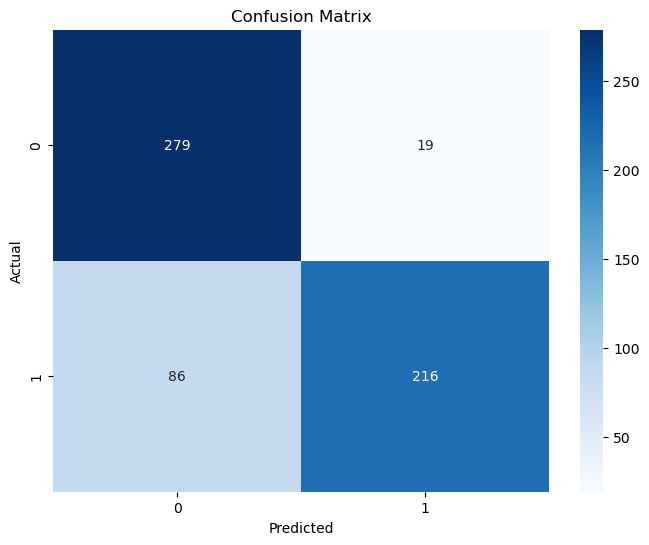

In [14]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.94      0.84       298
         2.0       0.92      0.72      0.80       302

    accuracy                           0.82       600
   macro avg       0.84      0.83      0.82       600
weighted avg       0.84      0.82      0.82       600



### RANDOM FOREST

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [16]:
X_train.shape

(3485, 19)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features="sqrt")
rf = rf.fit(X_train, y_train)

In [18]:
y_predRF = rf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_predRF)

print("Acurácia do modelo de Random Forest:", accuracy_bf)

Acurácia do modelo de Random Forest: 0.83


In [20]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predRF)

0.7722222222222223

In [21]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_predRF)

0.9328859060402684

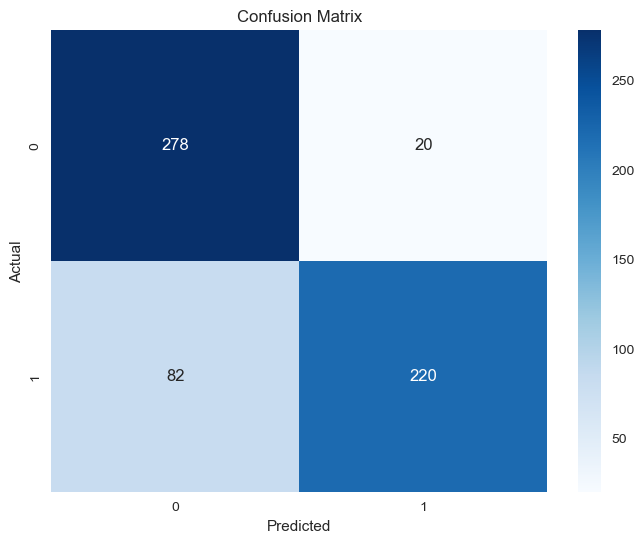

In [38]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         1.0       0.77      0.93      0.84       298
         2.0       0.92      0.73      0.81       302

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



### NAIVE

In [26]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [27]:
modelo.fit(X_train, y_train)

GaussianNB()

In [28]:
previsoes = modelo.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.795

In [34]:
precision_score(y_test,previsoes)

0.8181818181818182

In [35]:
recall_score(y_test,previsoes)

0.7550335570469798

In [32]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[225,  73],
       [ 50, 252]], dtype=int64)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.795

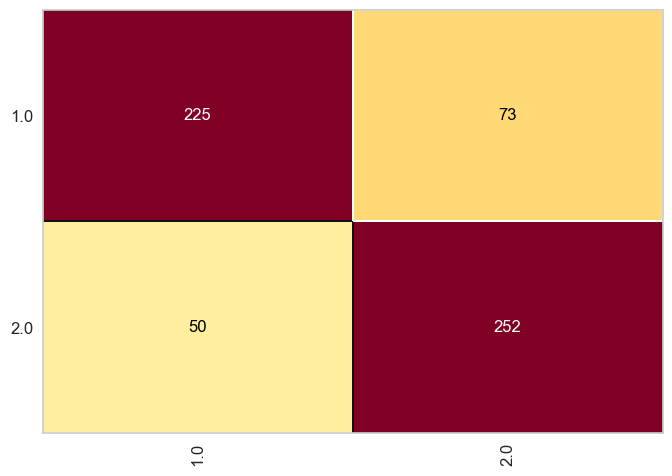

In [33]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.82      0.76      0.79       298
         2.0       0.78      0.83      0.80       302

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.79       600



## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [42]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [47]:
scoresAD = cross_val_score(clf, X_train, y_train, cv=kf)
scoresRF = cross_val_score(rf, X_train, y_train, cv=kf)
scoresNY = cross_val_score(modelo, X_train, y_train, cv=kf)
print("Acurácia média da Árvore:\n", scoresAD, scoresAD.mean(), "+-", scoresAD.std())
print("\nAcurácia média do RF:\n", scoresRF, scoresRF.mean(), "+-", scoresRF.std())
print("\nAcurácia média do Naive:\n", scoresNY, scoresNY.mean(), "+-", scoresNY.std())

Acurácia média da Árvore:
 [0.84527221 0.84527221 0.84527221 0.83954155 0.85386819 0.81034483
 0.83333333 0.83045977 0.8362069  0.85057471] 0.8390145901261403 +- 0.011863039330960298

Acurácia média do RF:
 [0.83667622 0.84813754 0.83954155 0.85386819 0.84527221 0.81896552
 0.84482759 0.81034483 0.85344828 0.84482759] 0.839590949510918 +- 0.013584082514204636

Acurácia média do Naive:
 [0.82808023 0.83667622 0.8252149  0.8252149  0.82808023 0.79597701
 0.83045977 0.81034483 0.8045977  0.83045977] 0.8215105556104468 +- 0.01251646813543404


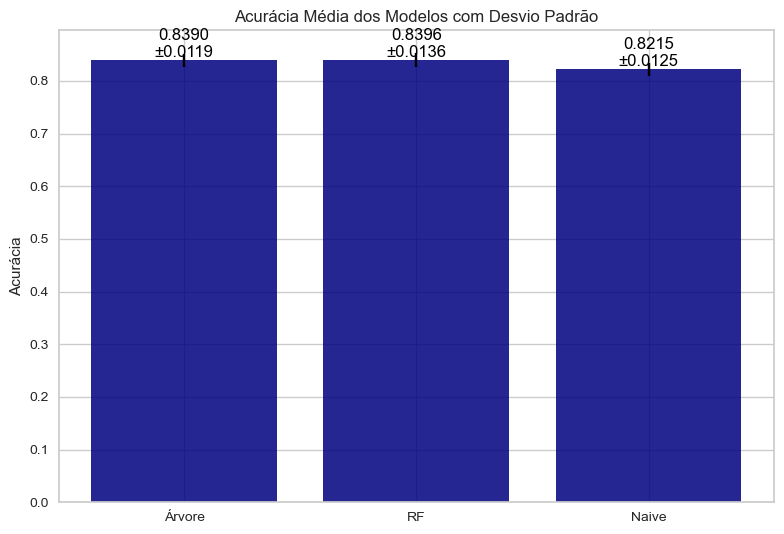

In [63]:
# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()